<h2><center>THE CHINESE UNIVERSITY OF HONG KONG<br /> 
    Department of Mathematics<br />
 MATH4280<br />
    Innovation and Design in Big Data Analytics</center></h2>

# LAB ASSIGNMENT ACTIVITY 3

# Question 1

Use PCA method to transform the iris data into 3 dimensional and visualize PCA with `px.scatter_3d`.

Define the transformed data as `Xtransform_PCA`. 

In [1]:
import plotly.express as px
from sklearn import datasets
from sklearn.decomposition import PCA
iris = datasets.load_iris()

df = px.data.iris()
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [2]:
print(X.head)

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]>


In [31]:
## Answer 1

## Write your answer here
pca = PCA(n_components=3).fit(X)
Xtransform_PCA = pca.transform(X)

    
## Do not change the following:
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    Xtransform_PCA, x=0, y=1, z=2, color=df['species'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

# Question 2

Perform SVD on the matrix A and tranform it to the matrix B.

(Say matrix A is any input matrix, matrix B is the result of transforming matrix A with PCA.
Perform SVD on the matrix A and tranform it with PCA, to reconstruct the matrix B.)

(Hint: https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca,
https://math.stackexchange.com/questions/3869/what-is-the-intuitive-relationship-between-svd-and-pca)

Example:


In [32]:
import numpy as np
from sklearn.decomposition import PCA
# define a matrix
A = np.array([[1, 2], [3, 4], [5, 6]])
print('A= ', A)
# create the PCA instance and fit on data
pca = PCA(n_components=2).fit(A)
# transform data
B = pca.transform(A)
print('B= ', B)

A=  [[1 2]
 [3 4]
 [5 6]]
B=  [[-2.82842712e+00  2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.82842712e+00 -2.22044605e-16]]


In [33]:
import numpy as np

# Define the data as a numpy array with float64 data type
data = np.array([[1, 2], [3, 4], [5, 6]], dtype=np.float64)
print('A= ', data)

def pcaSVD(X, num_components=None):
    """
    This function tries to encapsulates the repetitive operations in PCA in SVD. 
    """
    
    # Center the dataset to origin
    n, p = X.shape
    X -= X.mean(axis=0)

    # SVD
    u, sigma, vt = np.linalg.svd(X, full_matrices=False)

    if num_components is not None:
        # Keep only the specified number of components
        u = u[:, :num_components]
        sigma = sigma[:num_components]
        vt = vt[:num_components, :]

    # Cum.variance
    explained_variance_ratio = (sigma**2) / (n-1)

    # Restore truncated dataset X
    X_reduced = X @ vt.T

    return X_reduced, explained_variance_ratio

X_reduced, explained_variance = pcaSVD(data, num_components=2)

print(f"B: {X_reduced}")


A=  [[1. 2.]
 [3. 4.]
 [5. 6.]]
B: [[-2.82842712e+00  2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.82842712e+00 -2.22044605e-16]]


# Question 3

In this question, we are trying to do classification on face data. To improve the efficiency, we reduce the dimension of data via PCA.


Enter:

In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')
def plot_faces(pixels):
    fig, axes = plt.subplots(5, 5, figsize=(6, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()
    
df = pd.read_csv('face_data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


In [35]:
# explore the datasheet size.

df.shape

(400, 4097)

In [36]:
# explore the unique heads in the dataset

df['target'].nunique()

40

In [37]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y)

Use SVD to perform the below PCA example.

In [38]:
pca = PCA(n_components=105).fit(X_train)
X_train_pca = pca.transform(X_train)

In [39]:
# Note:
# X_train --> train the PCA_train_set
# PCA_train_set & y_train --> classifier 

# X_test --> prediction run on classifier
# classificaiton: y_test versus prediction(x_test)

classifier = SVC().fit(X_train_pca, y_train)
X_test_pca = pca.transform(X_test)
predictions = classifier.predict(X_test_pca)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      0.50      0.67         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       0.33      1.00      0.50         2
          13       1.00      1.00      1.00         5
          14       1.00      0.75      0.86         4
          15       1.00      0.75      0.86         4
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         4
          18       1.00    

In [40]:
# X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train_svd, explained_variance = pcaSVD(X_train, num_components=105)


In [41]:
# Note:
# X_train --> train the PCA_train_set
# PCA_train_set & y_train --> classifier 

# X_test --> prediction run on classifier
# classificaiton: y_test versus prediction(x_test)

classifier = SVC().fit(X_train_pca, y_train)
X_test_pca = pca.transform(X_test)
predictions = classifier.predict(X_test_pca)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      0.50      0.67         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       0.33      1.00      0.50         2
          13       1.00      1.00      1.00         5
          14       1.00      0.75      0.86         4
          15       1.00      0.75      0.86         4
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         4
          18       1.00    

Calculate `X_train_svd` by SVD and put it into SVC method to see it’s performance.

(Hint: Using `scipy.sparse.linalg.svds` to compute SVD since it is much faster than `np.linalg.svd` and `scipy.sparse.linalg.svds` can choose the number of singular values and vectors to compute.)

Read the documentation about `scipy.sparse.linalg.svds` before your attempt.


In [1]:
## answer 3
from scipy.sparse.linalg import svds
from scipy.sparse import csr_matrix
## Write your code here

def pcaSVD_scipy(X, num_components=None):
    """
    This function tries to encapsulate the repetitive operations in PCA using SVD. 
    """
    
    # Center the dataset to origin
    n, p = X.shape
    X = X - X.mean(axis=0)

    if num_components is not None:
        # Use scipy.sparse.linalg.svds for dimensionality reduction
        u, sigma, vt = svds(X, k=num_components) # this function already truncated the matrix 
    else:
        # Use all components
        u, sigma, vt = svds(X, k=min(n, p) - 1)


    # Restore truncated dataset X
    X_reduced = X @ vt

    return X_reduced, explained_variance_ratio, u, sigma, vt.T


X_train_svd, explained_variance, u, sigma, VT = pcaSVD_scipy(X_train, num_components =105)


## Do not change the following:

classifier = SVC().fit(X_train_svd, y_train)
Xm_test=X_test-np.mean(X_train, axis=0)
X_test_svd = np.dot(Xm_test,VT.T)
predictions = classifier.predict(X_test_svd)
print(classification_report(y_test, predictions))


NameError: name 'pcaSVD_scipy' is not defined

## Question 4
Enter

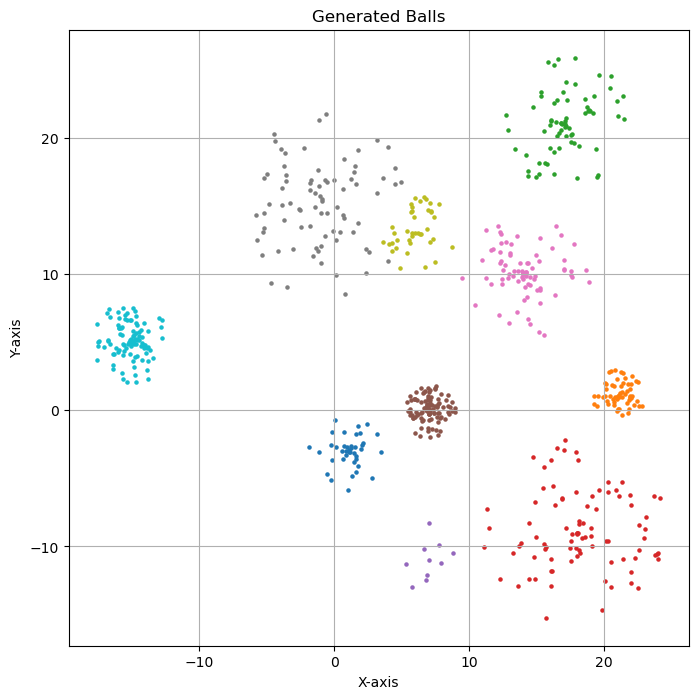

In [56]:
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(10)
np.random.seed(10)

def gen_ball(center,radius,num_per_group):    
    result=np.zeros((num_per_group,2))
    for i in range(num_per_group):
        theta= (2*random.random()-1)*np.pi
        r = radius*random.random()
        result[i,0]= center[0]+r*np.cos(theta)
        result[i,1]=center[1]+r*np.sin(theta)
    return np.array(result)


centers=np.array([[1,-3],[21,1],[17,21],[18,-9],[7,-11],
                 [7,0],[14,10],[-1,15],[6,13],[-15,5]])
radii=np.array([3,2,5,7,3,2,5,7,3,3])
nums=np.array([40,60,70,90,10,100,80,80,40,100])

### Q4a
The function `gen_ball(center,radius,num_per_group)` generates a dataset of size=`num_per_group`, with each datapoint randomly lying in a two-dimensional circle with center = `center` and radius = `radius`. 

The output of the function is a np.array of size (`num_per_group,2`).

With this function, we can create several scattered balls.

Which set of the two black lines below better represent the principal components of the data? Briefly explain.
<center>
<img src="Q4a.png">
</center>

In [44]:
## answer 4a
## Just type in your answer in text here.

"""
A:
Set A could represent the principal components of the data.
The principal components are determined based on the directions of maximum variance in the data. 
And the vertical line in set A has big variance of ball location and cannot alter it to take greater variance.

And the horizontal line in set A considered as the second principal components.

To conclude, set A is the one.
""" 


### Q4b

We now want to create 10 groups of scattered dots on $\mathbb{R}^2$ using `gen_ball`. Their respective centers, radius and numbers of points are stored in `centers`, `radii` and `nums`.

Perform PCA (with `n_components_ = 2`) on the whole dataset.

Plot all the raw datapoints (before PCA) on the graph with a different color for each group using `plt.scatter`. 

Add two black lines representing the direction of the principal components on the same plot.

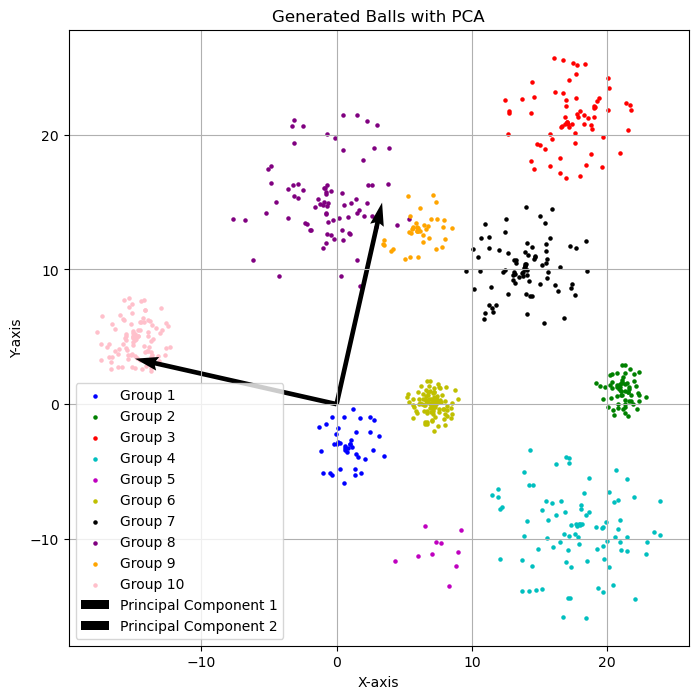

In [58]:
## answer 4b


import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

balls = []
for center, radius, num_per_group in zip(centers, radii, nums):
    ball = gen_ball(center, radius, num_per_group)
    balls.append(ball)

raw_data = np.vstack(balls)

pca = PCA(n_components=2)
pca.fit(raw_data)
transformed_data = pca.transform(raw_data)

plt.figure(figsize=(8, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'pink']
for i, ball in enumerate(balls):
    plt.scatter(ball[:, 0], ball[:, 1], s=5, label=f'Group {i+1}', c=colors[i])

mean_point = np.mean(transformed_data, axis=0)
pc1, pc2 = pca.components_
plt.quiver(*mean_point, *pc1, color='k', scale=3, label='Principal Component 1')
plt.quiver(*mean_point, *pc2, color='k', scale=3, label='Principal Component 2')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Generated Balls with PCA')
plt.grid(True)
plt.legend()
plt.show()


### Q4c

Suppose $a=(-15,5)$ and $b=(15,10)$. 

Use `plt.scatter` to plot them as two black dots after PCA on the PCA-transformed space. 

Also plot all the PCA-transformed data (the 10 groups of transformed data) on the same graph.


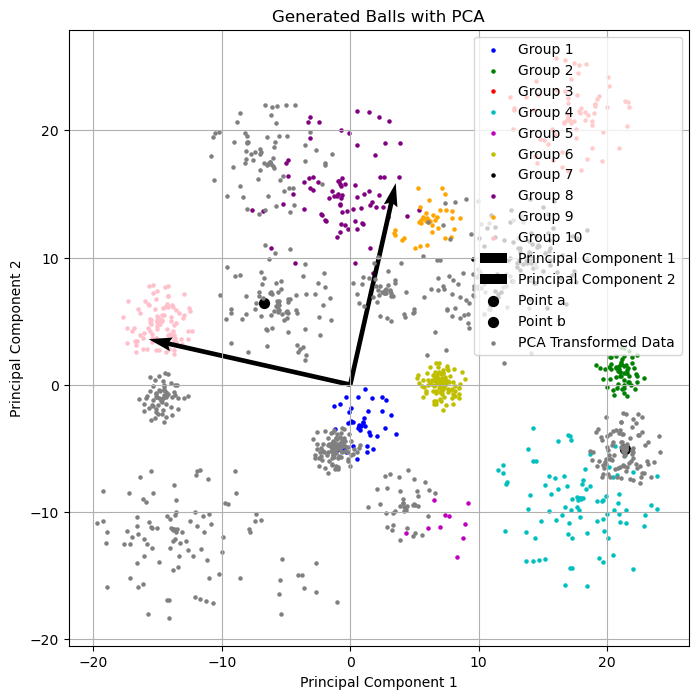

In [59]:
## answer 4c

raw_data = np.vstack(balls)

pca = PCA(n_components=2)
pca.fit(raw_data)
transformed_data = pca.transform(raw_data)

plt.figure(figsize=(8, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'pink']
for i, ball in enumerate(balls):
    plt.scatter(ball[:, 0], ball[:, 1], s=5, label=f'Group {i+1}', c=colors[i])

mean_point = np.mean(transformed_data, axis=0)
pc1, pc2 = pca.components_
plt.quiver(*mean_point, *pc1, color='k', scale=3, label='Principal Component 1')
plt.quiver(*mean_point, *pc2, color='k', scale=3, label='Principal Component 2')

point_a = pca.transform(np.array([[-15, 5]]))
point_b = pca.transform(np.array([[15, 10]]))
plt.scatter(point_a[:, 0], point_a[:, 1], s=50, color='black', marker='o', label='Point a')
plt.scatter(point_b[:, 0], point_b[:, 1], s=50, color='black', marker='o', label='Point b')

plt.scatter(transformed_data[:, 0], transformed_data[:, 1], s=5, color='gray', label='PCA Transformed Data')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Generated Balls with PCA')
plt.grid(True)
plt.legend()
plt.show()
